In [57]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random as rnd

class InfGraph:
    
    def __init__(self, num_agts = 0):
        self._num_agts = num_agts
        self._bel = np.zeros(num_agts)
        self._graph = np.zeros((num_agts,num_agts))
        self._bel_time = []
        self._max_time = []
        self._min_time = []
        self._sum_time = []
        
    def change_edge(self, i, j, inf):
        self._graph[i][j] = inf
        
    def change_bel(self, i, bel):
        self._bel[i] = bel
        
    def update_bel(self,  i, j, update_function="classic"):
        n = self._num_agts
        if(update_function == "classic"):
            return self._bel[i] + self._graph[j][i]*(self._bel[j]-self._bel[i])
        elif(update_function == "confirmation-bias"):
            f_confbias = 1 - abs(self._bel[i]-self._bel[j])
            return self._bel[i] + self._graph[j][i]*f_confbias*(self._bel[j]-self._bel[i])
        
    def update_node(self, i, update_function="classic"):
        n = self._num_agts
        ret = 0
        for j in range(n):
            ret += self.update_bel(i,j,update_function)
        ret /= n
        self._bel[i] = ret
        return ret
    
    def update_graph(self, update_function="classic"):
        for i in range(self._num_agts):
            self.update_node(i)
            
    def simulate(self, time=1, update_function="classic", save_bel=False, save_max=False,
                 save_min=False, save_sum=False):
        if(save_bel):
            self._bel_time.append(np.copy(self._bel))
        if(save_max):
            self._max_time.append(np.amax(self._bel))
        if(save_min):
            self._min_time.append(np.amin(self._bel))
        if(save_sum):
            self._sum_time.append(np.sum(self._bel))
        for i in range(time):
            self.update_graph()
            if(save_bel):
                self._bel_time.append(np.copy(self._bel))
            if(save_max):
                self._max_time.append(np.amax(self._bel))
            if(save_min):
                self._min_time.append(np.amin(self._bel))
            if(save_sum):
                self._sum_time.append(np.sum(self._bel))
        
    def build_graph(self, graph_type="clique", auto=True, zeros=0, inf=[]):
        #use auto = false if using parameters inf[]
        #use parameter zeros when graph_type = random to choose the prorportion of influence that
        #will be null
        n = self._num_agts
        if(graph_type == "clique"):
            for i in range(n):
                for j in range(n):
                    if(auto):
                        self.change_edge(i,j,0.5)
                    else:
                        self.change_edge(i,j,inf[0])
                    
        elif(graph_type == "disconnected"):
            for i in range(n):
                for j in range(n):
                    if(i+1 <= math.ceil(n/2) and j+1 <= math.ceil(n/2) or
                       i+1 > math.ceil(n/2) and j+1 > math.ceil(n/2)):
                        if(auto):
                            self.change_edge(i, j, 0.5)
                        else:
                            self.change_edge(i, j, inf[0])
                    else:
                        self.change_edge(i, j, 0)
                
        elif(graph_type == "faintly-connected"):
            for i in range(n):
                for j in range(n):
                    if(i+1 <= math.ceil(n/2) and j+1 <= math.ceil(n/2) or
                       i+1 > math.ceil(n/2) and j+1 > math.ceil(n/2)):
                        if(auto):
                            self.change_edge(i, j, 0.5)
                        else:
                            elsef.change_edge(i, j, inf[0])
                    else:
                        if(auto):
                            self.change_edge(i, j, 0.1)
                        else:
                            self.change_edge(i, j, inf[1])
                            
        elif(graph_type == "unrelenting-influencers"):
            # num_agts must be at least 2
            # inf1 = agt(0) and inf2 = agt(n-1)
            for i in range(n):
                for j in range(n):
                    if((i == 0 and j != n-1) or (i == n-1 and j!=0)):
                        if(auto):
                            self.change_edge(i, j, 0.6)
                        else:
                            self.change_edge(i, j, inf[1])
                    elif(i!=j and (j == 0 or j == n-1)):
                        self.change_edge(i, j, 0)
                    elif(0!=i and i!=n-1 and 0!=j and j!=n-1):
                        if(auto):
                            self.change_edge(i, j, 0.1)
                        else:
                            self.change_edge(i, j, inf[0])
                        
        elif(graph_type == "malleable-influencers"):
            # num_agts must be at least 2
            # inf1 = agt(0) and inf2 = agt(n-1)
            for i in range(n):
                for j in range(n):
                    if(i == 0 and j != n-1):
                        if(auto):
                            self.change_edge(i, j, 0.8)
                        else:
                            self.change_edge(i, j, inf[3])
                    elif(i!=n-1 and j!= 0):
                        if(auto):
                            self.change_edge(i, j, 0.5)
                        else:
                            self.change_edge(i, j, inf[2])
                    elif(i!=j and (j == 0 or j == n-1)):
                        if(auto):
                            self.change_edge(i, j, 0.1)
                        else:
                            self.change_edge(i, j, inf[0])
                    elif(0 != i and i != n-1 and 0 != j and j != n-1):
                        if(auto):
                            self.change_edge(i, j, 0.2)
                        else:
                            self.change_edge(i, j, inf[1])
                            
        elif(graph_type == "random"):
            for i in range(n):
                for j in range(n):
                    r = rnd.random()
                    if(r < zeros):
                        self.change_edge(i,j,0)
                    else:
                        self.change_edge(i,j,rnd.random())
                        
    def build_bel(self, bel_type="uniform", auto=True, inf=[]):
        #if passing inf as parameters pass auto=False
        #pass inf in increasing order
        
        n = self._num_agts
        if(bel_type == "uniform"):
            for i in range(self._num_agts):
                self.change_bel(i, i/(n-1))
                    
        elif(bel_type == "mildly-polarized"):
            for i in range(n):
                if(i <= math.ceil(n/2)):
                    self.change_bel(i,max(0.25-0.01*(math.ceil(n/2)-i-1), 0))
                else:
                    self.change_bel(i,min(0.75-0.01*(math.ceil(n/2)-i),1))
            
        elif(bel_type == "extremely-polarized"):
            for i in range(n):
                if(i < math.ceil(n/2)): #I put < instead of <= because it made more sense in the case n is odd
                    if(auto):
                        self.change_bel(i,0)
                    else:
                        self.change_bel(i,inf[0])
                else:
                    if(auto):
                        self.change_bel(i,1)
                    else:
                        self.change_bel(i,inf[1])
                    
        elif(bel_type == "trypartite"):
            for i in range(n):
                if(i < math.floor(n/3)):
                    if(auto):
                        self.change_bel(i,0)
                    else:
                        self.change_bel(i,inf[0])
                elif (i < math.ceil(2*(n/3))):
                    if(auto):
                        self.change_bel(i,0.5)
                    else:
                        self.change_bel(i,inf[1])
                else:
                    if(auto):
                        self.change_bel(i,1)
                    else:
                        self.change_bel(i,inf[2])
        elif(bel_type == "random"):
            for i in range(n):
                self.change_bel(i,rnd.random())
       
    def bfs(self, x):
        n = self._num_agts
        visited = [False]*n 
  
        queue = [] 
        queue.append(x) 
        visited[x] = True

        while queue: 
            u = queue.pop(0) 
            for i in range(n):
                if self._graph[u][i] == 0:
                    continue
                if visited[i] == False: 
                    queue.append(i) 
                    visited[i] = True        
        for v in visited:
            if(v == False):
                return False
        return True
    
    def is_weakly_connex(self):
        n = self._num_agts
        vis = np.zeros(n)
        
        for i in range(n):
            if self.bfs(i) == False:
                return False
        return True
    
    def plot_bel(self,plot_agts=True, plot_max=False, plot_min=False):
        fig = plt.gcf()
        fig.set_size_inches(18.5, 10.5)
        
        if(plot_agts):
            for i in range(self._num_agts):
                aux = []
                for j in range(len(self._bel_time)):
                    aux.append(self._bel_time[j][i])
                plt.plot(aux, '--')
        if(plot_max):
            plt.plot(self._max_time, label='Max')
        if(plot_min):
            plt.plot(self._min_time, label='Min')
        if(plot_max or plot_min):
            plt.legend()
        plt.xlabel("Time")
        plt.ylabel("Belief")
        plt.show()
    
    def plot_sum(self):
        fig = plt.gcf()
        fig.set_size_inches(18.5, 10.5)
        plt.plot(self._sum_time)
        plt.xlabel("Time")
        plt.ylabel("Sum of Beliefs")
    
    def print_graph(self, adj_list=False):
        if(adj_list == False):
            for i in range(self._num_agts):
                for j in range(self._num_agts):
                    print('%.2f' %self._graph[i][j], end = " ")
                print()
            print()
        else:
            for i in range(self._num_agts):
                print(i, end=": ")
                for j in range(self._num_agts):
                    if(self._graph[i][j] != 0):
                        print("(",j,",",self._graph[i][j],")",end=", ")
                print()

    def print_bel(self):
        print(self._bel)
        print()
        
    def print_time(self):
        for i in range(len(self._bel_time)):
            print(self._bel_time[i])

[ 0.          0.          1.          0.27272727  0.36363636  0.45454545
  0.54545455  0.63636364  0.72727273  0.81818182  0.90909091  1.        ]



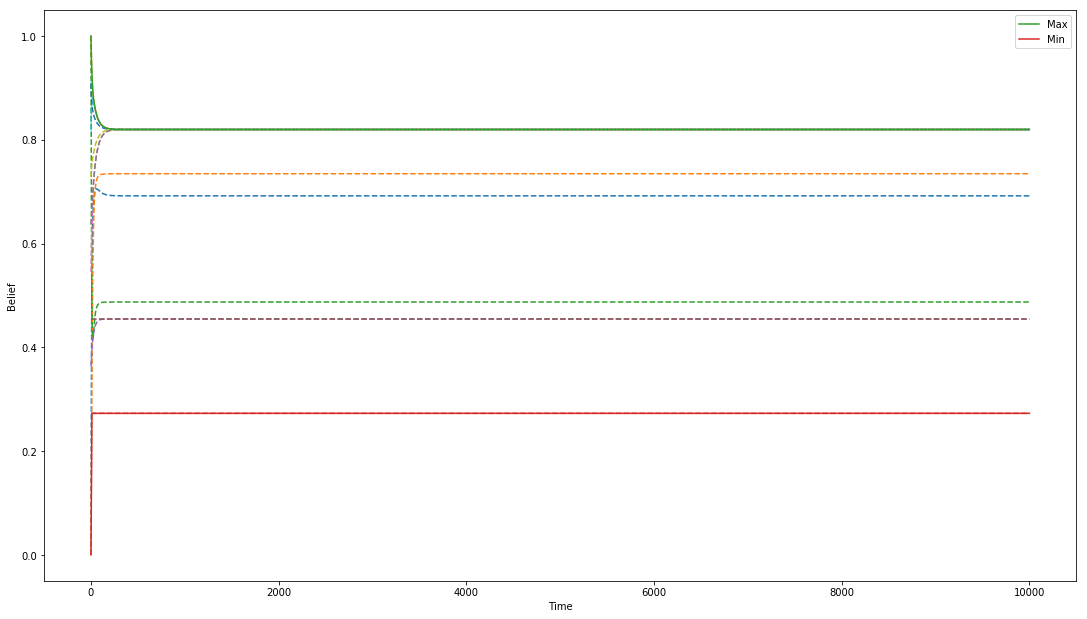

not-weakly-connex


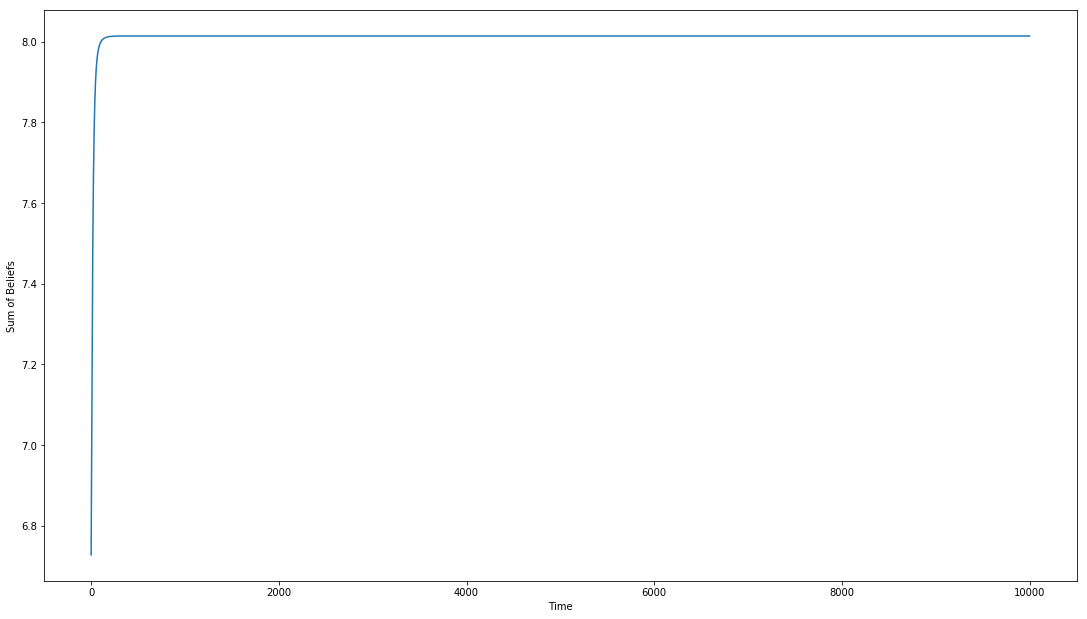

In [64]:
graph = InfGraph(num_agts=12)

graph.build_bel()
#graph.build_graph(graph_type="random",zeros=0.8)

graph.change_bel(0,0)
graph.change_bel(1,0)
graph.change_bel(2,1)
graph.print_bel()

graph.change_edge(0,1,1)
graph.change_edge(1,2,0.5)
graph.change_edge(2,0,0.5)
graph.change_edge(6,1,0.5)
graph.change_edge(7,6,0.5)
graph.change_edge(8,6,0.5)
graph.change_edge(8,7,0.5)
graph.change_edge(8,10,0.5)
graph.change_edge(9,10,0.5)
graph.change_edge(10,9,0.5)
graph.change_edge(9,11,0.5)
graph.change_edge(11,9,0.5)
graph.change_edge(10,11,0.5)
graph.change_edge(11,10,0.5)
graph.change_edge(9,0,0.8)
graph.change_edge(5,4,0.5)
graph.change_edge(4,2,0.5)
graph.change_edge(3,2,0.5)
graph.change_edge(10,8,0.5)
graph.change_edge(7,8,0.5)

graph.simulate(time=10000, save_bel=True, save_max=True, save_min=True, save_sum=True)

graph.plot_bel(plot_agts=True, plot_max=True, plot_min=True)
graph.plot_sum()

if(graph.is_weakly_connex()):
    print('weakly-connex')
else:
    print('not-weakly-connex')

In [65]:
graph.print_graph(adj_list=False)

0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.50 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.50 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.50 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.50 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.50 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.50 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.50 0.00 0.50 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.50 0.50 0.00 0.00 0.50 0.00 
0.80 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.50 0.50 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.50 0.50 0.00 0.50 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.50 0.50 0.00 



In [66]:
graph.print_bel()

[ 0.69187692  0.73450556  0.48725943  0.27272727  0.45454545  0.45454545
  0.81976285  0.81976285  0.81976285  0.81976285  0.81976285  0.81976285]

